## Problem statement
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose. Specifically, in this project you should:
* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set.


## Choosing the Phenomenon to Simulate Data for

Having spent some time trying to think of a phenomenon that could be convincingly modelled by using one's only own judgement, and having considered, for example, creating a dataset similar to [Verizon's data breach investigation report datasets] (https://enterprise.verizon.com/resources/reports/dbir/), I concluded that it would be best to lessen as much as possible the severity of the suspension of disbelief required to take the dataset seriously. In this vein, I decided to model a very uncomplicated phenomenon, namely, student satisfaction for a module in such a course as GMIT's Higher Diploma in Data Analytics (at least I think that's what it's still called - it might have been changed to 'Higher Diploma in Data Fabrication' considering the nature of this assessment).


## Approach to Simulating the Data

To create the dataset, I imagined that a thousand students had completed a survey with seven questions:

1. What is your age?

2. How satisfied were you with your lecturer's engagement with you and the course?

3. How satisfied were you with the structure and pace of the module?

4. Did you find the module-content interesting?

5. How would you rate the difficulty of the module?

6. Were the assessments of the module appropriate to the module content?

7. How satisfied were you with the module overall?

In the case of the first question, the options available to the respondent were:
* (20-25) 
* (25-30) 
* (30-35) 
* (35-40) 
* (40-50) 
* (50-65). 

For the other six questions, the respondent was given five possible answers to choose from, namely: 
* (very unsatisfied/easy/unappropriate) 
* (unsatisfied/easy/unappropriate) 
* (neutral) 
* (satisfied/difficult/appropriate) 
* (very satisfied/difficult/appropriate).


Because we are in a sense 'reverse engineering' a datasest, the easiest way to create the dataset would likely be to first determine the distribution for the variable that could be said to be the target variable, i.e. a variable that is more determined than determining in relation to the other variables in the dataset. Of course, there is not necessarily just one target variable in every dataset, and the lines being target and non-target (i.e. dependent) variables can often blur. However, in our dataset, there happens to be one main, target variable.

In our dataset, the target variable would of course be the answer to the seventh question, 'how satisfied were you with the module overall'. I assumed a distribution approximate to the normal distribution for this variable. I say 'approximate' here because of course all the variables in this dataset are discrete, and the actual normal distribution is continuous. Thus, to create the values for the 'overall satisfaction' variable, I used numpy.random.normal() with a mean of three and standard deviation of 1, rounding each result to the nearest integer, and replacing any values less than zero with zero, and any greater than five with five. The fact that we are removing the tails of the distribution of course takes away from the 'normal-ness' of the distribution, but that is acceptable for our purpose, as this is a discrete variable in any case. 

Once the target variable's distribution has been determined, its dependent variable's distribution and values can more easily be determined, particularly in our case when all the depentable variables have the say scale (very un-, un-, neutral, affirmative, very affirmative). The dependent variables (the only justification here is my own judgement - these are simulated, hypothetical relationships) are the answers to questions, 2 ('engagement'), 3 ('structure'), 4 ('interesting') and 6 ('assessment'). If we assume that those values will also be approximately normally distributed, then for each datapoint, we can add more or less noise to the target variable value and take that 'noisened' value as the dependent value, e.g. the dependent variables more closely correlated to the target variable will have less noise. We can create the noise by generating a normal distribution with only one datapoint, taking the datapoint's target variable value ('overall satisfaction') as the mean, and the standard deviation as the noise. This will account for the relationships between the target variable and each of its dependent variables.

The other variables in this dataset are 'age' and 'difficulty', and they actually comprise a target and dependent variable set themselves, with age determining  difficulty, i.e. older age brackets finding the module more difficult. This time we set probabilities for each age bracket, and select an age bracket based on those probabilities for each data point, using numpy.random.choice. Then the the value for 'difficulty' for each datapoint is determined using the age-bracket. Each difficulty value is taken from a normal distribution, with the mean of that distribution *depending* on the age-bracket, i.e. higher means for higher age-brackets.

That concludes how I simulated the data. Below is the code for performing the simulation

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

# age brackets
ages = ["20-25", "25-30", "30-35", "35-40", "40-50", "50-65"]
# corresponding probabilities
ageProbs = [0.2,0.25,0.3,0.15, 0.06, 0.04]

# select 1000 age brackets according to probabilities
age = np.random.choice(ages, 1000, replace=True, p=ageProbs)
print(Counter(age))
# generate approximately normal distribution of satisfaction answers using list comprehension
# good overview of list comprehensions here: https://appdividend.com/2020/05/13/python-list-replace-replace-string-integer-in-list/
satisfaction = [1 if x < 1 else x for x in [5 if x > 5 else x for x in [int(x.round()) for x in np.random.normal(3, 1, 1000)]]]
# I have incorporated the below list comprehensions into the above
#removeOverFives = [5 if x > 5 else x for x in overallSatisfaction]
#removeUnderZeros = [1 if x < 1 else x for x in overallSatisfaction]

difficulty = []
# greater mean difficulty score for higher age brackets
# difficult is dependent on age, but nothing else
agesDiffMeans = {ages[0]:3, ages[1]:3, ages[2]:3, ages[3]:3.5, ages[4]:3.75, ages[5]:4}
for y in age:
    difficulty.append([1 if x < 1 else x for x in [5 if x > 5 else x for x in [int(x.round()) for x in np.random.normal(agesDiffMeans[y], 1, 1)]]][0])
# create a dictionary to store the data and column names
# for now we will only include the remaining data to be simuluated
# this way we can loop through the dictionary to simulate the data
# we will include standard deviation as an extra key value pair for each item
# as this will needed to created the data
data = {}
data.update({"engagement":{"data":np.array([]), "std": 0.8}})
data.update({"structure":{"data":np.array([]), "std": 1}})
data.update({"content":{"data":np.array([]), "std": 0.3}})
data.update({"assessment":{"data":np.array([]), "std": 0.6}})

for key, value in data.items():
    value['data'] = np.array([1 if x < 1 else x for x in [5 if x > 5 else x for x in [int(x.round()) for x in [x + np.random.normal(0, value['std'], 1) for x in satisfaction]]]])
    # we don't need the standard deviation anymore, so we get rid of it
    # we change the dictionary to a simpler format: 'column name':data
    # this will allow us to use the dict to create a Pandas DataFrame
    data[key] = [x for x in value['data']]

# now add in the data we had already calculated
data.update({"difficulty":difficulty})
data.update({"age":age})
data.update({"satisfaction":satisfaction})

# print out the frequencies for each column, using collections.Counter
for key, value in data.items():
    print(f"{key} counts are: {Counter(data[key])}")

# create a DataFrame for easy display
df = pd.DataFrame.from_dict(data)
# display at least 30 rows
pd.set_option('display.min_rows', 30)
df


Counter({'30-35': 299, '25-30': 264, '20-25': 195, '35-40': 150, '40-50': 55, '50-65': 37})
engagement counts are: Counter({3: 321, 2: 216, 4: 215, 1: 134, 5: 114})
structure counts are: Counter({3: 282, 4: 221, 2: 213, 1: 155, 5: 129})
content counts are: Counter({3: 352, 2: 275, 4: 232, 5: 72, 1: 69})
assessment counts are: Counter({3: 331, 4: 240, 2: 228, 1: 117, 5: 84})
difficulty counts are: Counter({3: 371, 4: 277, 2: 221, 5: 90, 1: 41})
age counts are: Counter({'30-35': 299, '25-30': 264, '20-25': 195, '35-40': 150, '40-50': 55, '50-65': 37})
satisfaction counts are: Counter({3: 389, 2: 263, 4: 229, 1: 62, 5: 57})


,engagement,structure,content,assessment,difficulty,age,satisfaction
0,1,4,2,1,2,35-40,2
1,5,5,4,3,2,35-40,4
2,3,1,3,3,3,20-25,3
3,1,2,1,1,3,30-35,1
4,3,3,4,4,4,25-30,4
5,1,1,1,1,5,30-35,1
6,1,3,1,1,2,25-30,1
7,1,5,2,2,2,30-35,2
8,2,4,3,2,4,20-25,3
9,4,2,3,3,4,25-30,3


## Analyzing the Data



When analyzing any dataset, one doesn't begin 'blind.' One almost always has a certain understanding of what variables one is working with, and likely which variables are going to be most interesting. In this dataset, it is of course the 'satisfaction' variable values that is going to be the most important to look at, or rather, how those values are related to the other variables. However, before analyzing the relationships, the first to do would be to look at each variable individually, i.e. plot histograms for each variable to see how their valuesare distributed.

## Step 1: Use Histograms to Observe Variables' Frequency Distributions

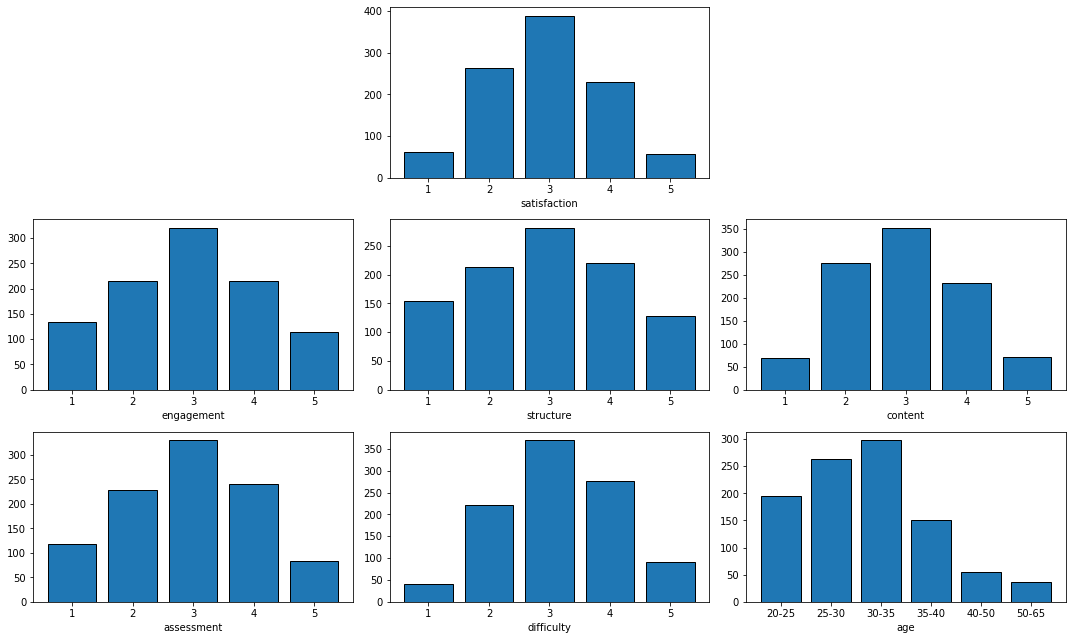

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3, figsize=(15,9))

axes = [ax4, ax5, ax6, ax7, ax8, ax9, ax2]
for column, axis in zip(df.columns, axes):
    labels, counts = np.unique(df[column], return_counts=True)
    axis.bar(labels, counts, align='center', edgecolor='k')
    axis.set_xlabel(column)

fig.delaxes(ax1)
fig.delaxes(ax3)
fig.tight_layout()
plt.show()



The following is immediately obvious from looking at the histograms:

* Except age, all of the variables have a bell shaped distribution with 3 being most frequent, followed by 2 or 4, and lastly 1 or 5. They appear to be symmetric without significant skew.

* The Age variable is not bell shaved, but heavily skewed heavily towards the left. It still one reasonably central upper limit, however.

* The Satisfaction and Content histograms are very similar in shape, indicating a strong correlation between the two perhaps.

* The Difficulty histogram appears to be skewed somewhat toward the right. Apart from age, it is the most skewed.

* Engagement and Structure have higher frequencies for 1 and 5, i.e. low kurtosis, or 'fatter' tails.

Once we have initially understand the distribution of each of the variables, we should move on to examining the relationships between the variables, particularly where relationships have been suggested through the histograms, such as between Satisfaction and Content. Of course, one can perform further analysis of each distribution, by performing kernel density estimates and performing tests to check if the variable samples are likely to have been drawn from particular distributions, but the relative simplicity of the survey that these data points are being drawn renders such in-depth analysis superfluous.


### Step 2: Visual Analysis of Relationships between Variables

When performing visual analysis of variables' relationships, Seaborn's pairplot is usually the first port of call. However, in our case, because there are only five possible values for each variable (apart from age), most of the datapoints will be overlayed on top of each other, and as the density of each point will not be displayed, we will likely be faced with a five by five grid of twenty five points, hardly revealing of anything.  For the sake of showing this, I will call pairplot() on the dataframe, using Age as the hue. One thing to note, however, is that there are still some discernable suggestions of relationships, such as between Content and Satisfaction, as above. Note also the large differences in shapes of the kernel density estimates of the Difficulty variable for each Age variable.

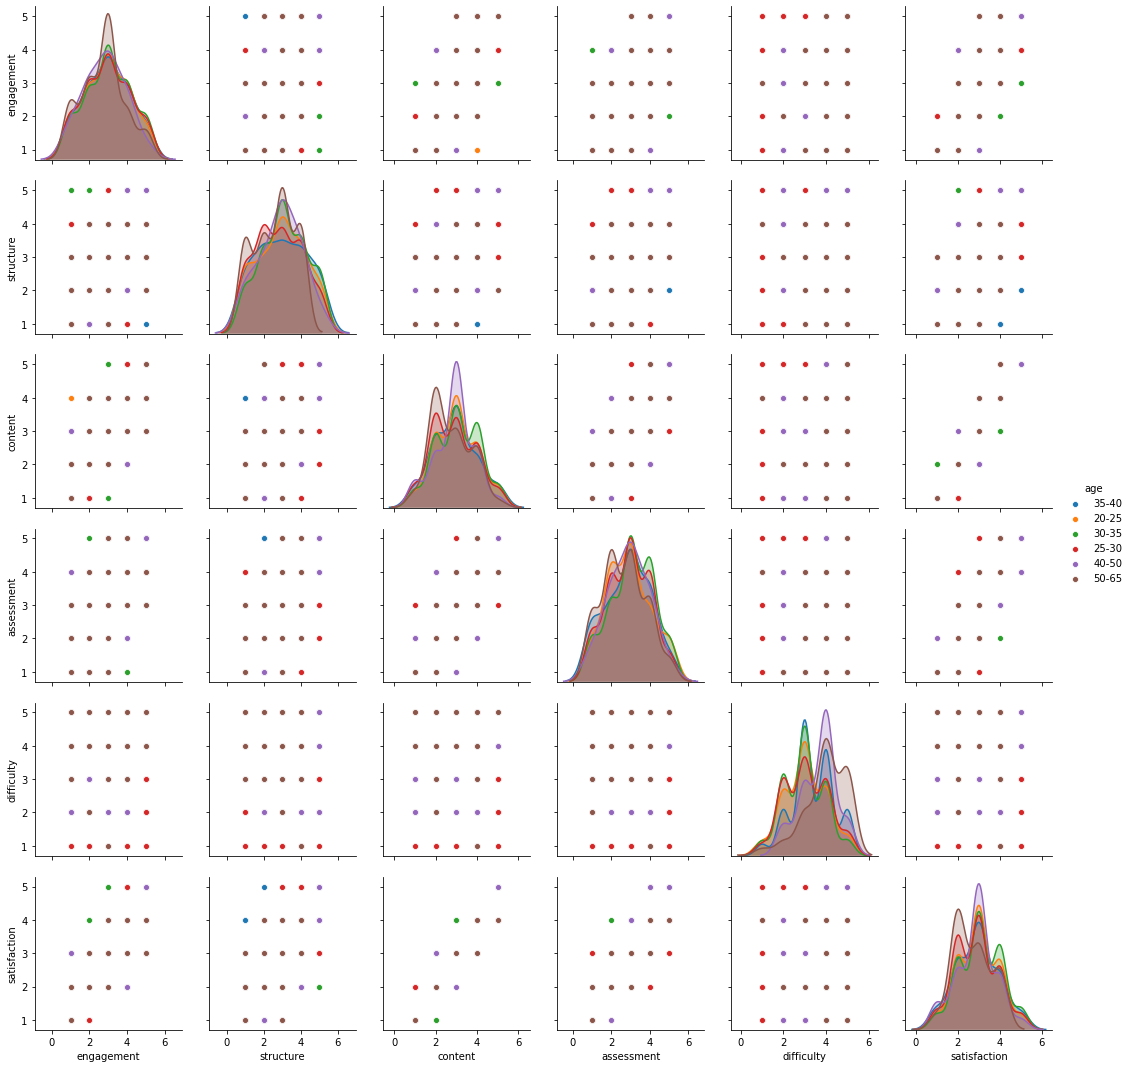

In [3]:
import seaborn as sb
sb.pairplot(df, hue='age')
plt.show()

### Step 3: Linear Regression to Analyze Relationships Between Variables

Because the relationships between our discrete distributions are not given to being easily visually analyzed through plotting, the next step would be to analyze the relationships non-visually, i.e. by calculating statistics for the relationships, such as the accuracy and error rates of linear regression models used to predict one variable based on another. This can easily be done using sklearn.

A reasonable approach to this would be to first create a multiple linear regression model by using all the variables except Satisfaction and Age as our inputs, and having Satisfaction as the output to be predicted based on those inputs. We prioritize this model, as intuition suggests that the value of a datapoint's Satisfaction is determined by those other variables. As a measure of whether Satisfaction can accurately be predicted/determined by those inputs, we could calculate the accuracy of the model (how often the prediction was correct), and two common measures of a predictive model's error rate: mean absolute error, which is the mean of the absolute value of the error for each datapoint, and root mean squared error, which is the equivalent for error measuring as what standard deviation is for variance-measuring. All of these values are attributes of sklearn's linear regression model, once fitted.

As to why I calculated two measures for error - there are advantages to either measure. Mean absolute error is intuitive, while root mean squared error is more amenable to mathematics and penalized severe errors heavily. There is a very clear introduction to the reasons why one might choose to evaluate a model's mean absolute error versus its root mean squared error [here] (https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d). To quote from the insightful conclusions to this article:

> Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable.

>From an interpretation standpoint, MAE is clearly the winner. RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand.
On the other hand, one distinct advantage of RMSE over MAE is that RMSE avoids the use of taking the absolute value, which is undesirable in many mathematical calculations (not discussed in this article, another time…).

There is clear introduction to using Linear Regression and calculating error values with sklearn [here] (https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/).

There is a 'relentlessly pruned' example of how to use sklearn to calculate acccuracy [here] (https://mahata.github.io/machine%20learning/2014/12/31/sklearn-accuracy_score/).

Once we have calculated the above multiple linear regression model, another reasonable step would be to calculating the single linear regression models between each pair of variables, which in our case of 6 variables (discounting Age) is fifteen pairs. We can then list then in order of accuracy and error measures to understand which variables are most and least correlated.

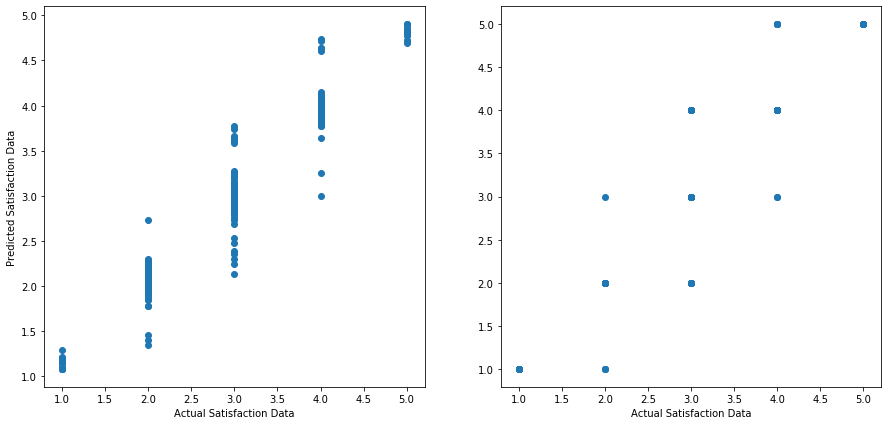

The mean absolute error is 0.15925885690771022
The root mean squared error is 0.235046131979139
The accuracy of our model is 0.92


In [4]:
# some code adapted from here:
# https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# our dependent variables
x = df[['engagement', 'content', 'structure', 'assessment', 'difficulty']]
# our target variable
y = df['satisfaction']

# train our model on 0.7 of our data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes[0].scatter(y_test, predictions)
axes[0].set_ylabel("Predicted Satisfaction Data")
axes[0].set_xlabel("Actual Satisfaction Data")
axes[1].scatter(y_test, predictions.round())
axes[1].set_xlabel("Actual Satisfaction Data")
plt.show()

print(f'The mean absolute error is {metrics.mean_absolute_error(y_test, predictions)}')
print(f'The root mean squared error is {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')
print(f'The accuracy of our model is {metrics.accuracy_score(y_test, predictions.round())}')


In [5]:
variables = ['engagement', 'content', 'structure', 'assessment', 'difficulty', 'satisfaction']

rmseResults = {}
meaResults = {}
accResults = {}

for x in variables:
    for y in variables:
        if x == y:
            continue
        if variables.index(y) < variables.index(x):
            continue
        x_train, x_test, y_train, y_test = train_test_split(df[[x]], df[[y]], test_size = 0.3)
        model = LinearRegression()
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        mea = metrics.mean_absolute_error(y_test, predictions)
        rmse = np.sqrt(metrics.mean_squared_error(y_test, predictions))
        accuracy = metrics.accuracy_score(y_test, predictions.round())
        print(f'The model for "{x}" as the predictor of "{y}" resulted in the following measures of error:')
        print(f'\tThe mean absolute error is {mea}')
        print(f'\tThe root mean squared error is {rmse}')
        print(f'\tThe accuracy is {accuracy}\n')
        
        rmseResults.update({f"{x}-{y}": rmse})
        meaResults.update({f"{x}-{y}": mea})
        accResults.update({f"{x}-{y}": accuracy})

sortedResults = dict(sorted(rmseResults.items(), key=lambda item: item[1]))
print('The rankings for variable relationships according to the root mean squared error is as follows:')
for i, result in enumerate(sortedResults):
    print(f'{i+1} - {result} - {sortedResults[result]}')

sortedResults = dict(sorted(meaResults.items(), key=lambda item: item[1]))
print('\nThe rankings for variable relationships according to the mean absolute error is as follows:')
for i, result in enumerate(sortedResults):
    print(f'{i+1} - {result} - {sortedResults[result]}')

sortedResults = dict(sorted(accResults.items(), key=lambda item: item[1], reverse=True))
print('\nThe rankings for variable relationships according to their accuracy is as follows:')
for i, result in enumerate(sortedResults):
    print(f'{i+1} - {result} - {sortedResults[result]}')

The model for "engagement" as the predictor of "content" resulted in the following measures of error:
	The mean absolute error is 0.552433030836295
	The root mean squared error is 0.6906652623985692
	The accuracy is 0.5133333333333333

The model for "engagement" as the predictor of "structure" resulted in the following measures of error:
	The mean absolute error is 0.9610907500026357
	The root mean squared error is 1.161069691603746
	The accuracy is 0.27666666666666667

The model for "engagement" as the predictor of "assessment" resulted in the following measures of error:
	The mean absolute error is 0.6899435741957217
	The root mean squared error is 0.8455513500990229
	The accuracy is 0.38666666666666666

The model for "engagement" as the predictor of "difficulty" resulted in the following measures of error:
	The mean absolute error is 0.7945956308081544
	The root mean squared error is 0.9945554727158672
	The accuracy is 0.38333333333333336

The model for "engagement" as the predictor

We can see that the regardless of the measure of error, majority of the models have an error of between 0.5 and 1, while only the model where Content/Satisfaction predict has measures of error much closer to zero (between 0.1 and 0.4). Of course, these measures of error are only meaningful in the scale of our variables, so in a sense it is up to us determine what is an acceptable mean error.

Similarly, Content/Satisfaction model's accuracy is far higher (around 0.9) compared to all other models.

The conclusion from this stage of the analysis would thus be that if one wanted to improve Satisfaction ratings, the best place to start would be with improving course content, followed by the next highest ranked models (Assessment/Satisfaction) and so on.

It is also worth nothing that the models involving Difficulty are lower down the rankings. This is due to the fact that Difficulty is dependent on Age, and as such is less correlated with the other variables.

Of course, the rankings match the standard deviations that we used to actually simulate the data, with lower deviations from the Satisfaction scores (such as Content and Assessment) resulting in better models  for prediction of Satisfaction.